Data Cleaning
- The primary files contain an identifier, as well as title, release, runtime and voting information for several movies. 
- The label column denotes whether a movie was highly rated or not.

In [71]:
pip install pandas unidecode

Note: you may need to restart the kernel to use updated packages.


In [2]:

import os
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

In [ ]:
folder_path = '/Users/bognarlili/Desktop/big-data-course-2024-projects/imdb'

all_files = [f for f in os.listdir(folder_path) if f.startswith('train-') and f.endswith('.csv')]
df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in all_files]
df = pd.concat(df_list, ignore_index=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15128 entries, 0 to 15127
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      15128 non-null  int64  
 1   tconst          15128 non-null  object 
 2   primaryTitle    15128 non-null  object 
 3   originalTitle   7543 non-null   object 
 4   runtimeMinutes  15116 non-null  object 
 5   numVotes        14338 non-null  float64
 6   label           15128 non-null  bool   
 7   year            7169 non-null   float64
 8   startYear       7959 non-null   object 
 9   endYear         7959 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 1.1+ MB
None


Data Cleaning
- Excluded data without number of votes 
- Mapped the weird symbols
- I combined the two years columns into a common column; if there is no data for the start year (startYear), I filled in the end year (endYear).
- Replaced na with NaN

In [67]:


def clean_data(file_path):
    df = pd.read_csv(file_path)
    df['primaryTitle'] = df['primaryTitle'].apply(lambda x: unidecode(str(x)))
    df.replace('\\N', pd.NA, inplace=True)
    df['year'] = df['startYear'].fillna(df['endYear'])
    df['numVotes'] = pd.to_numeric(df['numVotes'], errors='coerce')
    df = df.dropna(subset=['numVotes'])
    df.drop(columns=['startYear', 'endYear'], inplace=True)
    output_file = file_path.replace('.csv', '_cleaned.csv')
    df.to_csv(output_file, index=False)
    print(f"Cleaned file saved to: {output_file}")


Iterate over train.csv

In [ ]:
def clean_all_files(folder_path):
    for file in os.listdir(folder_path):
        if file.startswith('train-') and file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            print(f"Cleaning: {file}")
            clean_data(file_path)
            print(f"{file} cleaned!\n")

In [69]:
folder_path = '/Users/bognarlili/Desktop/big-data-course-2024-projects/imdb'
clean_all_files(folder_path)

 Cleaning: train-4_cleaned.csv


KeyError: 'startYear'

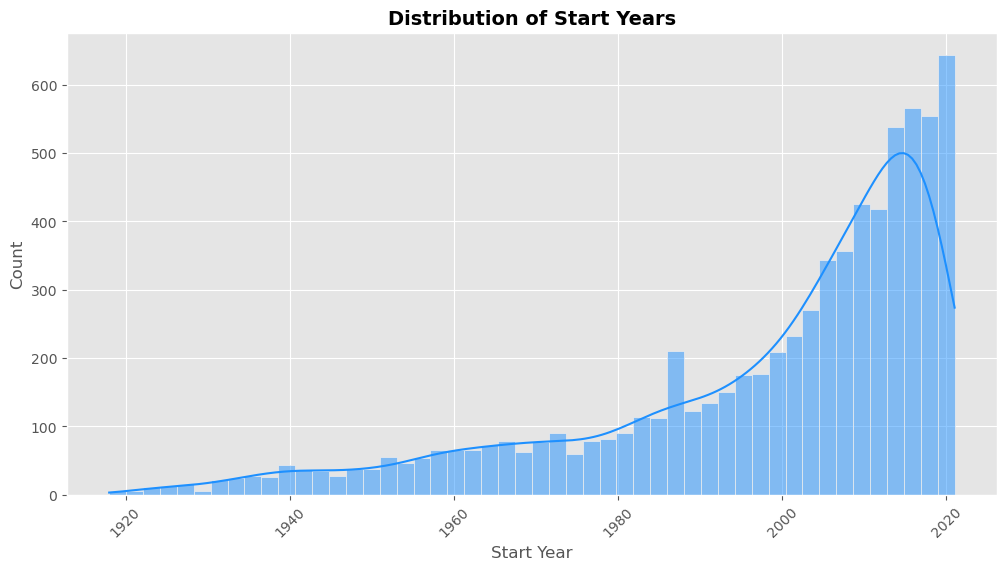

In [ ]:

df.replace('\\N', pd.NA, inplace=True)
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')
df = df[(df['startYear'] >= 1800) & (df['startYear'] <= 2100)]  


plt.figure(figsize=(12, 6))
sns.histplot(df['startYear'].dropna(), bins=50, kde=True, color='dodgerblue')
plt.xlabel('Start Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Start Years', fontsize=14, fontweight='bold')


plt.xticks(rotation=45, fontsize=10)
plt.show()




In [ ]:
#cleaned data to Maria's repo
source_folder = '/Users/bognarlili/Desktop/big-data-course-2024-projects/imdb'
destination_folder = 'Big_Data_IMDb'
os.makedirs(destination_folder, exist_ok=True)
for file in os.listdir(source_folder):
    if file.endswith('_cleaned.csv'):
        shutil.copy(os.path.join(source_folder, file), os.path.join(destination_folder, file))
        print(f"{file} copied to {destination_folder}")

train-4_cleaned.csv copied to Big_Data_IMDb
train-8_cleaned.csv copied to Big_Data_IMDb
train-1_cleaned.csv copied to Big_Data_IMDb
train-2_cleaned.csv copied to Big_Data_IMDb
train-7_cleaned.csv copied to Big_Data_IMDb
train-5_cleaned.csv copied to Big_Data_IMDb
train-6_cleaned.csv copied to Big_Data_IMDb
train-3_cleaned.csv copied to Big_Data_IMDb


In [3]:
#cleaned data code to Maria's repo
source_folder = '/Users/bognarlili/Desktop/big-data-course-2024-projects/imdb'
destination_folder = 'Big_Data_IMDb'
os.makedirs(destination_folder, exist_ok=True)

file = 'data_cleaning.ipynb'
if file in os.listdir(source_folder):
    shutil.copy(os.path.join(source_folder, file), os.path.join(destination_folder, file))
    print(f"{file} copied to {destination_folder}")
else:
    print(f"{file} not found in {source_folder}")


data_cleaning.ipynb copied to Big_Data_IMDb
